利用データ：Customer Personality Analysis
Analysis of company's ideal customers（Akash Patel）uploaded to kaggle
https://www.kaggle.com/imakash3011/customer-personality-analysis/code


参照先プログラム：Customer Segmentation- Product Based
https://www.kaggle.com/uniquekale/customer-segmentation-product-based


In [ ]:
# 必要ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pprint

In [ ]:
# rowdataの読み込み
df_customer = pd.read_csv('/content/marketing_campaign.csv', sep='\t')
df_customer.head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


# データの前処理

In [ ]:
# rowdataのデータ数
df_customer.shape

(2240, 29)

ファイルを読み込むときにsepメソッドをしてしないと中身が分割しなかった
 ←元のデータのスタイルがテーブル形式だったのか??



In [ ]:
# 各列のデータタイプ&欠損値を確認
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# 欠損データ行の削除
df_customer = df_customer.dropna().reset_index(drop = True)
df_customer.head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [ ]:
# 基本統計量
df_customer.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df_customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# adding new columns
df_customer['Age'] = 2021 - df_customer['Year_Birth']
df_customer['MntTotalProducts'] = df_customer['MntWines'] + df_customer['MntFruits'] + df_customer['MntMeatProducts'] + df_customer['MntFishProducts'] + df_customer['MntSweetProducts'] + df_customer['MntGoldProds']

# Renaming columns
numeric_column_all = ['income', 'kidhome',
                   'teenhome', 'recency', 'mntwines', 'mntfruits',
                   'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
                   'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
                   'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
                   'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
                   'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response']

numeric_columns = ['income', 'kidhome',
                   'teenhome', 'recency', 'mntwines', 'mntfruits',
                   'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
                   'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
                   'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']

bool_columns = ['acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
                   'acceptedcmp2', 'complain', 'response']
df_customer = df_customer.rename(columns={'Response' : 'AcceptedCmp6'})

categorical_columns = ['education', 'marital_status']

date_columns = ['year_birth','dt_customer'] 

# Changing data types and dropping columns
df_customer['Dt_Customer'] = pd.to_datetime(df_customer['Dt_Customer'])
df_customer['Education'], df_customer['Marital_Status'] = df_customer['Education'].astype('category'), df_customer['Marital_Status'].astype('category')

df_customer.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# Classifying DataFrame
variable_all_df = df_customer.loc[ : , ['Age', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntTotalProducts', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

variable_df = df_customer.loc[ : , ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency']]

mnt_df = df_customer.loc[ : , ['MntTotalProducts', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]
num_purchases_df = df_customer.loc[ : , ['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

campaign_df = df_customer.loc[ : , ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']]



In [ ]:
# データの分布確認
##箱ヒゲ図の関数定義
def get_box(input_data):
  output_data = input_data.copy()
  fig = plt.figure(figsize=(20,100))
  num_columns = output_data.columns
  for i in range(len(num_columns)):
    plt.subplot(len(num_columns), 4, i+1)
    output_data[num_columns[i]].plot(kind = "box")
  return output_data

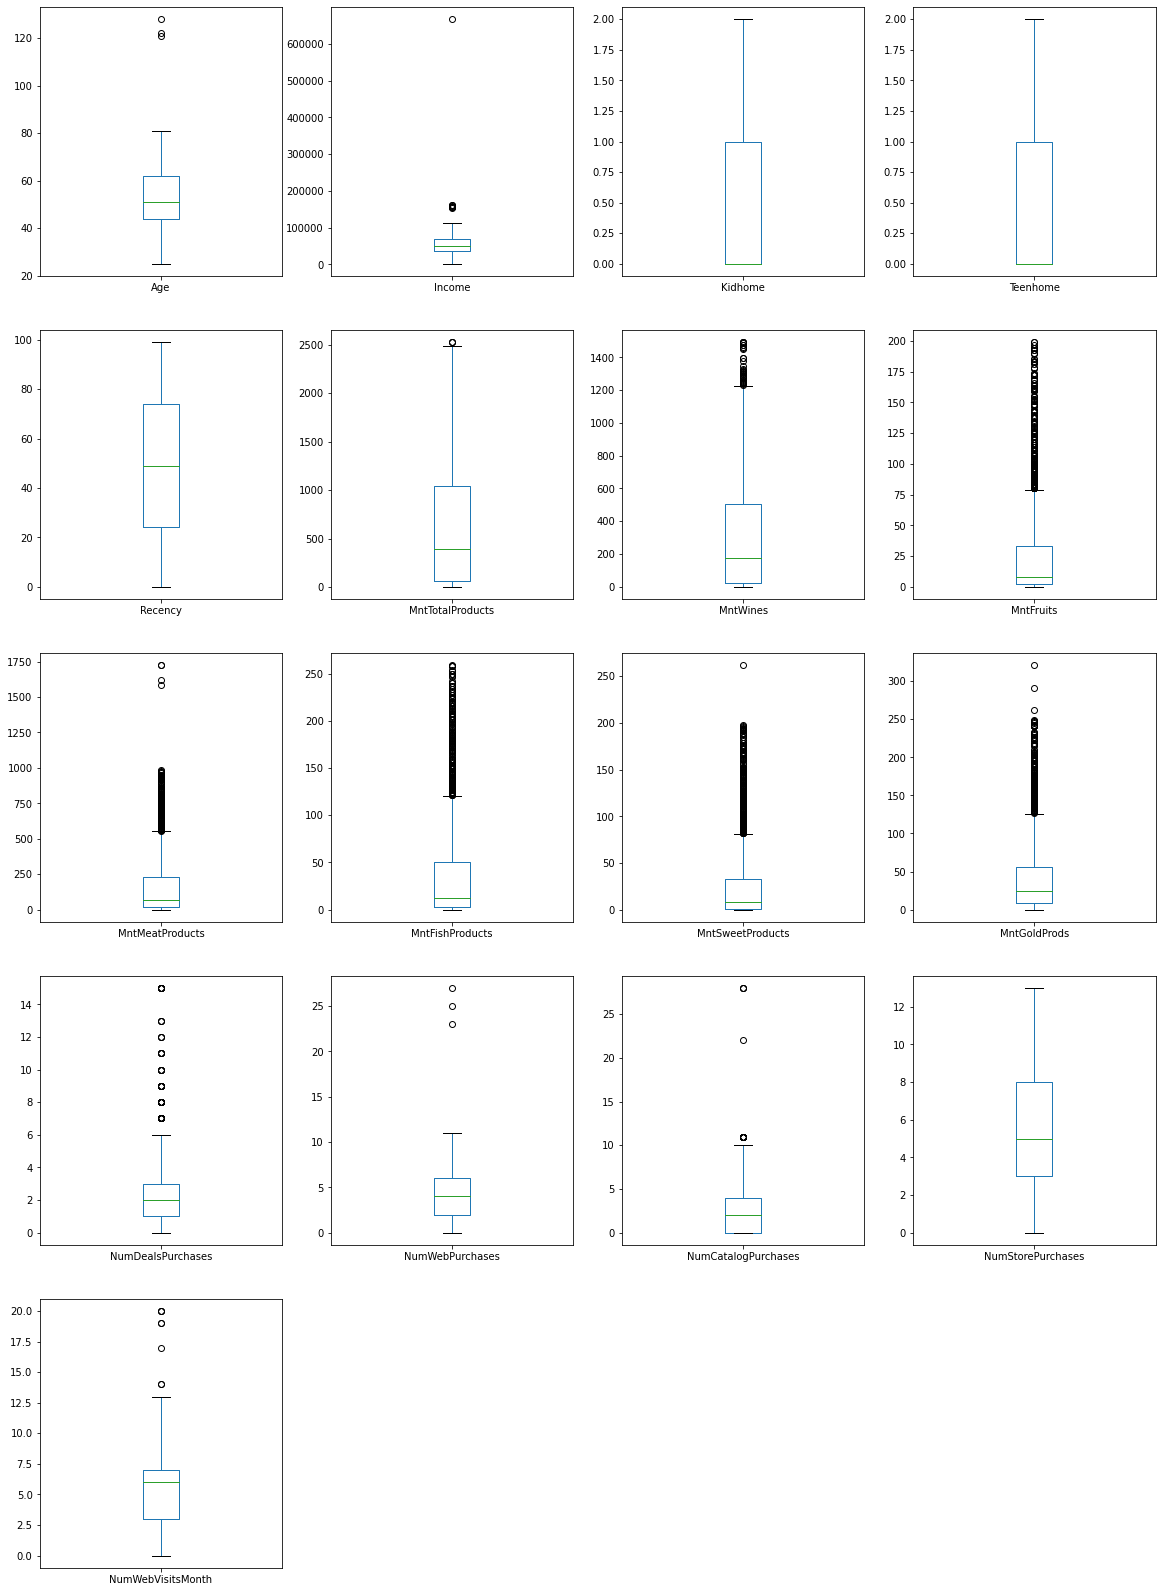

In [ ]:
# 各列の箱ヒゲ図を図示
df_var = get_box(variable_all_df)

Kidhome, Teenhome, Recency, NumStorePurchasesの4つ以外の列に外れ値が存在する事が確認できた

In [ ]:
def Outlier_By_IQR(input_data):
  output_data = input_data.copy()
  numeric_columns_to_filter = ['Age', 'Income','MntTotalProducts', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumWebVisitsMonth']
  for i in range(len(numeric_columns_to_filter)):
    q1 = output_data[numeric_columns_to_filter[i]].quantile(0.25)
    q3 = output_data[numeric_columns_to_filter[i]].quantile(0.75)
    iqr = q3 - q1
    bottom = q1 - 1.5*iqr
    up = q3 + 1.5*iqr
    print(numeric_columns_to_filter[i])
    print(f'Q1：{q1}')
    print(f'Q3：{q3}')
    print(f'IQR：{iqr}')
    print('外れ値は↓')
    print(output_data[numeric_columns_to_filter[i]][(output_data[numeric_columns_to_filter[i]] < bottom) | (output_data[numeric_columns_to_filter[i]] > up)])
    print('********************************************************')
  return output_data

df_outlier = Outlier_By_IQR(variable_all_df)

Age
Q1：44.0
Q3：62.0
IQR：18.0
外れ値は↓
181    121
228    128
326    122
Name: Age, dtype: int64
********************************************************
Income
Q1：35303.0
Q3：68522.0
IQR：33219.0
外れ値は↓
153     157243.0
604     162397.0
642     153924.0
674     160803.0
1287    157733.0
1636    157146.0
2109    156924.0
2209    666666.0
Name: Income, dtype: float64
********************************************************
MntTotalProducts
Q1：69.0
Q3：1048.0
IQR：979.0
外れ値は↓
1166    2525
1475    2524
1555    2525
Name: MntTotalProducts, dtype: int64
********************************************************
MntWines
Q1：24.0
Q3：505.0
IQR：481.0
外れ値は↓
102     1332
150     1349
284     1241
411     1285
417     1248
453     1239
484     1396
502     1288
510     1379
530     1478
546     1492
811     1492
813     1279
857     1308
904     1478
924     1253
974     1394
977     1296
988     1285
997     1230
1039    1315
1178    1298
1441    1302
1471    1449
1475    1259
1560    1252
1624    1459
1732 

購入金額や購入経路に関しては明確な外れ値は存在しない。
一方で年齢や収入に関しては現実的でない値や明らかに標準偏差を歪ませているデータがあるため、外れ値として排除する。

In [ ]:
# Deleting outliers
numeric_columns_to_filter = ['Age', 'Income']

Q1 = df_customer[numeric_columns_to_filter].quantile(0.25)
Q3 = df_customer[numeric_columns_to_filter].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df_customer[~((df_customer[numeric_columns_to_filter] < (Q1 - 1.5 * IQR)) |(df_customer[numeric_columns_to_filter] > (Q3 + 1.5 * IQR))).any(axis=1)]

display(df_customer.shape)
display(df_filtered.shape)

(2216, 29)

(2205, 29)

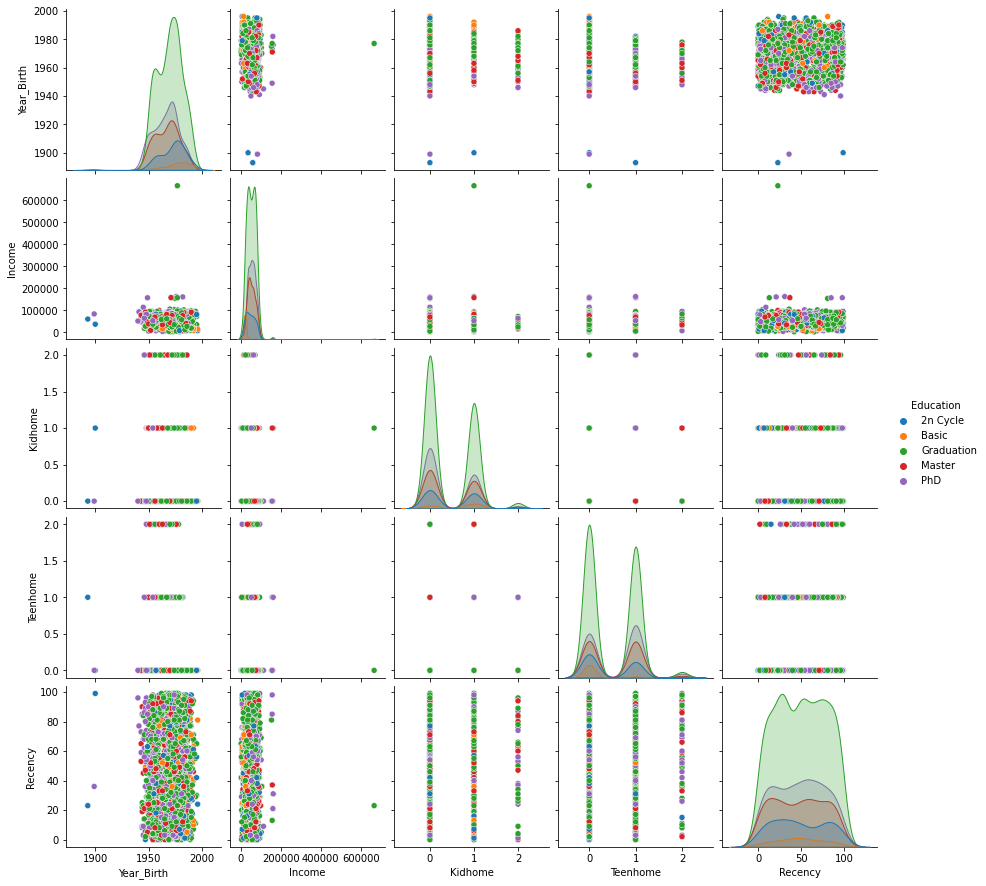

In [ ]:
# 購入者の特徴に関する散布図（学歴別にソート）
sns.pairplot(data=variable_df, hue='Education')

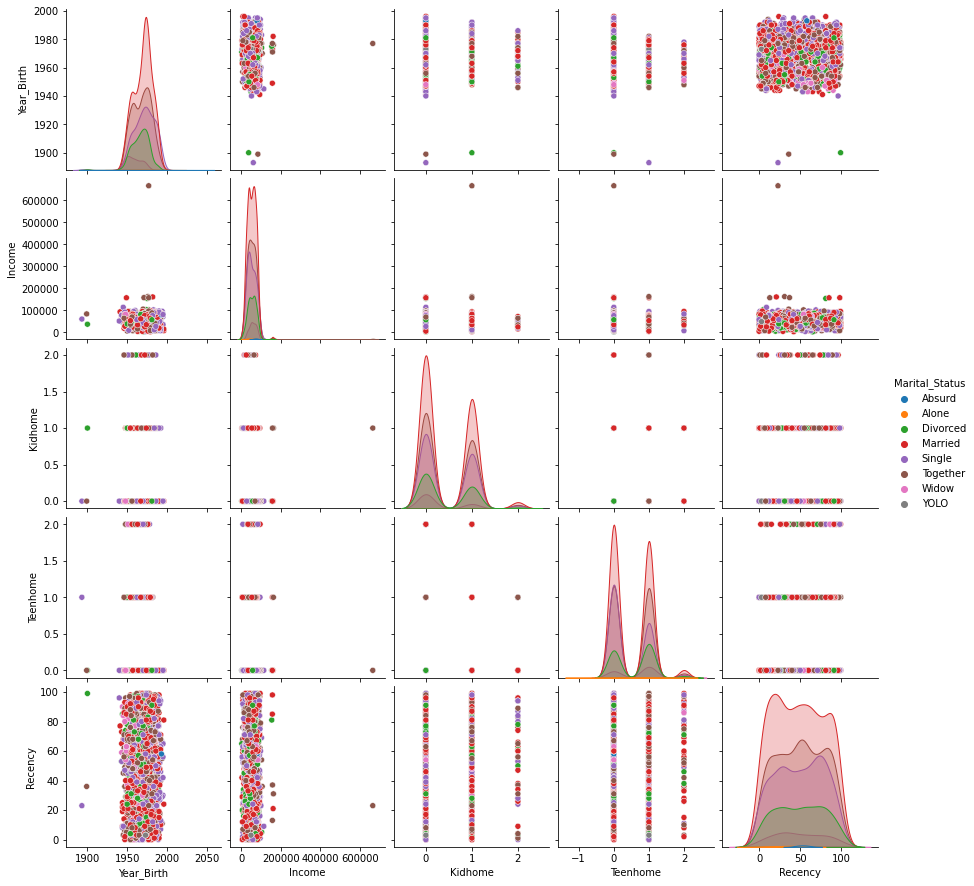

In [ ]:
# 購入者の特徴に関する散布図（結婚状況別にソート）
sns.pairplot(data=variable_df, hue='Marital_Status')

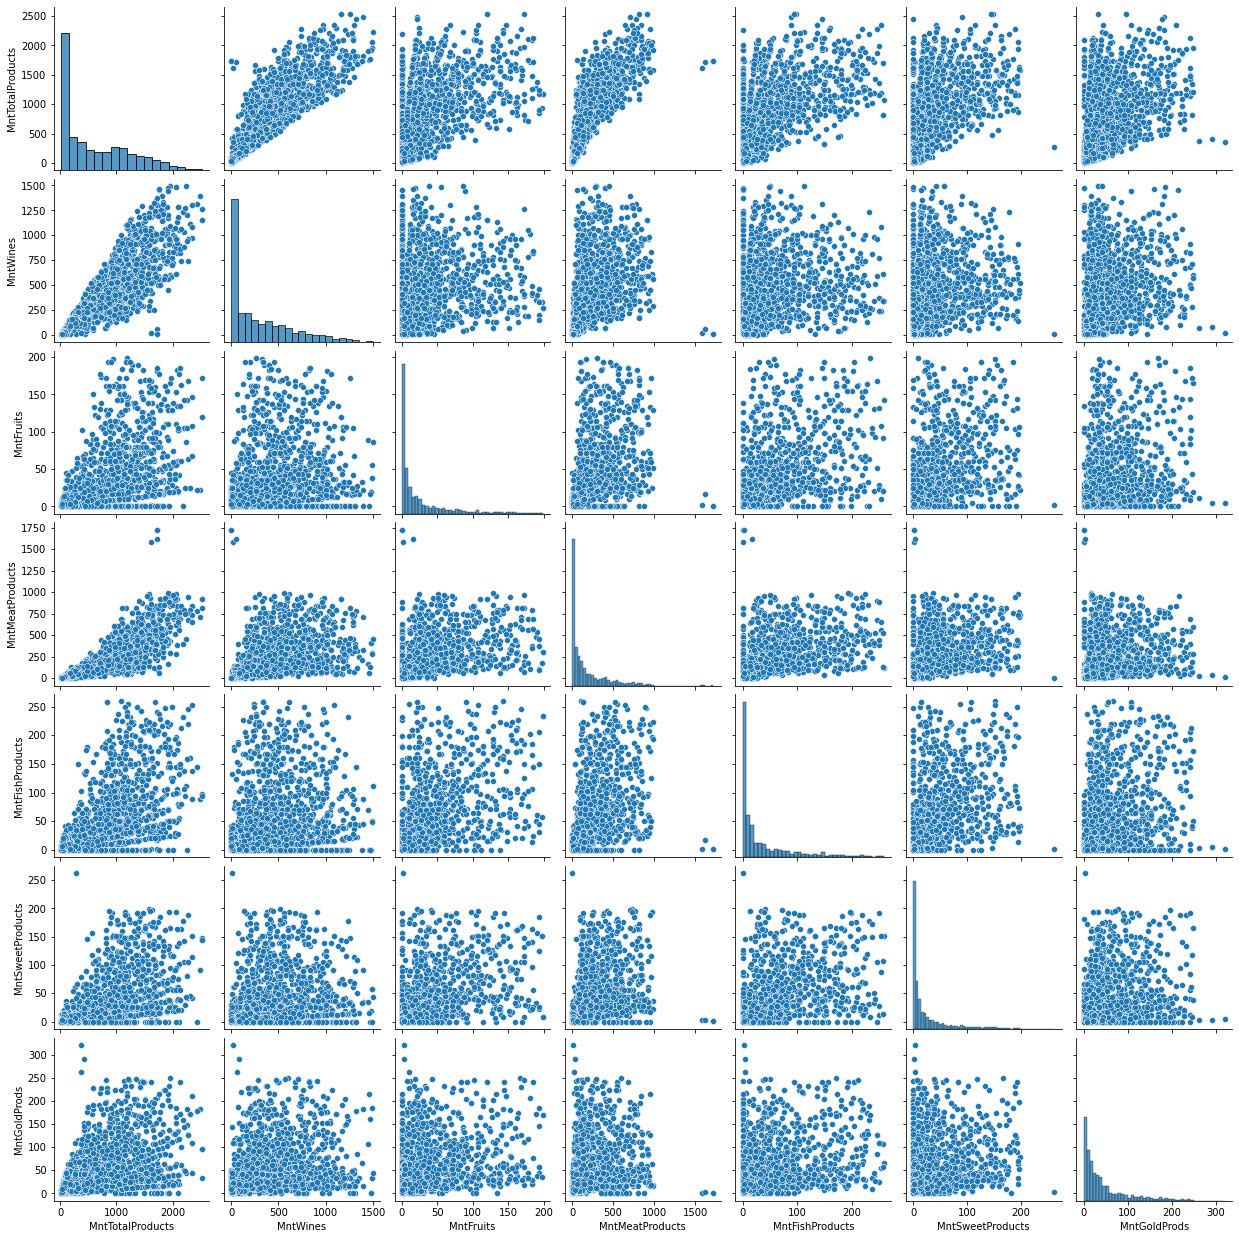

In [ ]:
# 品目別購入額の散布図
sns.pairplot(data=mnt_df)

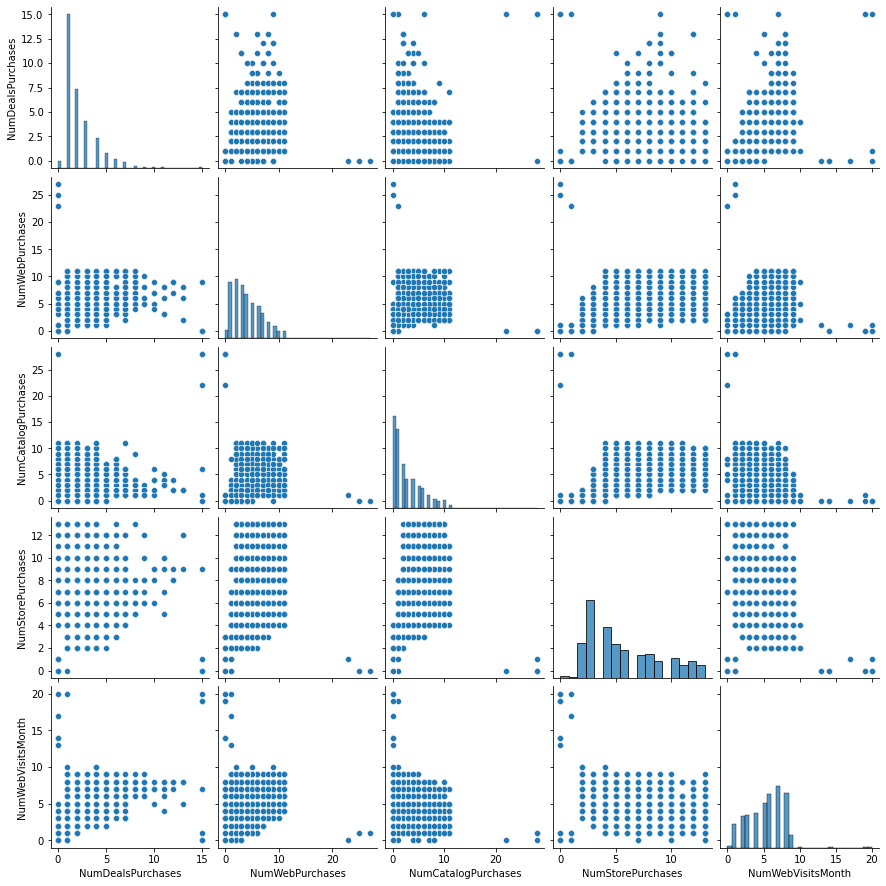

In [ ]:
# 購入経路の散布図
sns.pairplot(data=num_purchases_df)

##EDA(Explanatory Data Analysis) 

In [ ]:
# データの追加（基本情報）

## 年齢層
### 各年齢層の要素数をカウントして定義
age_teenager = len(df_customer[(df_customer['Age']>0)&(df_customer['Age']<20)])
age_20s = len(df_customer[(df_customer['Age']>=20)&(df_customer['Age']<30)])
age_30s = len(df_customer[(df_customer['Age']>=30)&(df_customer['Age']<40)])
age_40s = len(df_customer[(df_customer['Age']>=40)&(df_customer['Age']<50)])
age_50s = len(df_customer[(df_customer['Age']>=50)&(df_customer['Age']<60)])
age_over60 = len(df_customer[(df_customer['Age']>=60)])

df_customer['Age Group'] = pd.Series()

for i in range(len(df_customer['Age'])):
  if (df_customer.at[i, 'Age']<30):
    df_customer.at[i, 'Age Group'] = 20
  elif (df_customer.at[i, 'Age']<40):
    df_customer.at[i, 'Age Group'] = 30
  elif (df_customer.at[i, 'Age']<50):
    df_customer.at[i, 'Age Group'] = 40
  elif (df_customer.at[i, 'Age']<60):
    df_customer.at[i, 'Age Group'] = 50
  else:
    df_customer.at[i, 'Age Group'] = 60

### カウント数をコラム名を定義して辞書型で保存
l1 = ["teenager", "20s", "30s", "40s", "50s", "over60"]
l2 = [age_teenager, age_20s, age_30s, age_40s, age_50s, age_over60]

age_df = pd.DataFrame({'age group' : l1, 'count' : l2})

age_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if sys.path[0] == '':


,age group,count
0,teenager,0
1,20s,28
2,30s,314
3,40s,649
4,50s,579
5,over60,646


Text(0, 0.5, 'Count')

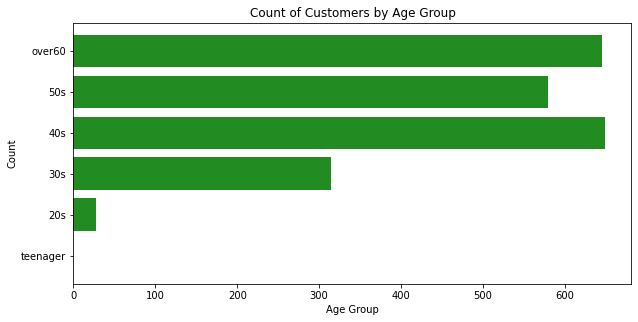

In [ ]:
### 年齢層を棒グラフで図示

fig, ax = plt.subplots(figsize = (10, 4.8))
plt.barh(age_df['age group'], age_df['count'], color = 'forestgreen')
plt.title('Count of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

In [ ]:
# 基本情報（学歴）
education_columns = df_customer['Education'].unique()
dataset_education = df_customer['Education'].tolist()

edu_item_count = []

for edu_column in education_columns:
  edu_count = dataset_education.count(edu_column)
  print(f'{edu_column}：{edu_count}')

  edu_item_count.append(edu_count)

Graduation：1116
PhD：481
Master：365
Basic：54
2n Cycle：200


Text(0, 0.5, 'Education')

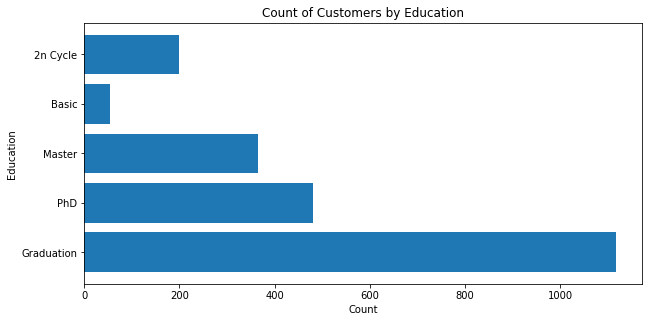

In [ ]:
y = education_columns
width = edu_item_count

fig, ax = plt.subplots(figsize = (10, 4.8))
plt.barh(y=y, width=width)
plt.title('Count of Customers by Education')
plt.xlabel('Count')
plt.ylabel('Education')

In [ ]:
# 基本情報（結婚情報）
marital_columns = df_customer['Marital_Status'].unique()
df_customer_marital = df_customer['Marital_Status'].tolist()

mar_item_count = []

for mar_col in marital_columns:
  mar_count = df_customer_marital.count(mar_col)
  print(f'{mar_col}：{mar_count}')

  mar_item_count.append(mar_count)

Single：471
Together：573
Married：857
Divorced：232
Widow：76
Alone：3
Absurd：2
YOLO：2


Text(0, 0.5, 'Marital Status')

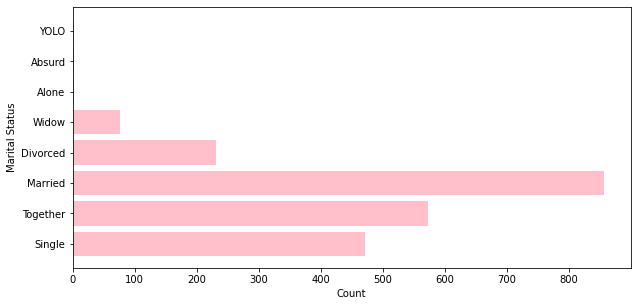

In [ ]:
y = marital_columns
width = mar_item_count
fig, ax = plt.subplots(figsize = (10, 4.8))
plt.barh(y=y, width=width, color='pink')
plt.xlabel('Count')
plt.ylabel('Marital Status')

In [ ]:
# 基本情報（収入）
df_filtered['Income'].sort_values(ascending = False)

1881    113734.0
633     105471.0
241     102692.0
192     102160.0
115     101970.0
          ...   
1958      4428.0
1829      4023.0
1507      3502.0
20        2447.0
1232      1730.0
Name: Income, Length: 2205, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

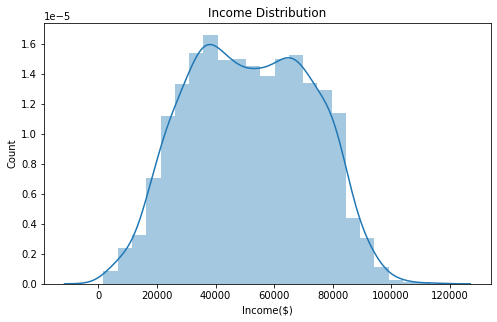

In [ ]:
fig, ax = plt.subplots(figsize = (8.0, 4.8))
sns.distplot(df_filtered['Income'])
plt.title('Income Distribution')
plt.xlabel('Income($)')
plt.ylabel('Count')

# VS

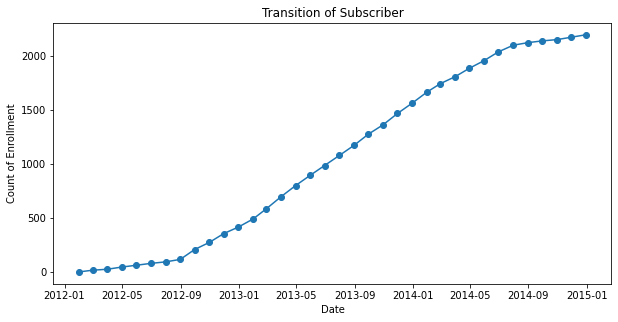

In [ ]:
# EC加入者の推移

#  インデックスを一時的に変更
df_customer.set_index('Dt_Customer', inplace=True)

date_enrollment = df_customer['ID'].resample('M').count()

values_date_enrollment = date_enrollment.tolist()
sigma_values_date_enrollment = []
for i in range(len((values_date_enrollment))):
  sigma_values_date_enrollment.append(sum(values_date_enrollment[:i]))
index_date_enrollment = date_enrollment.index

fig, ax = plt.subplots(figsize = (10.0, 4.8))
plt.plot(index_date_enrollment, sigma_values_date_enrollment, marker = 'o')
plt.title('Transition of Subscriber')
plt.xlabel('Date')
plt.ylabel ('Count of Enrollment')
plt.show()

# df_customerのインデックスを再定義
df_customer = df_customer.reset_index()

In [ ]:
"""
ID列の前にDt_Customer列が来ていることに注意
"""
df_customer.head()

,Dt_Customer,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age,MntTotalProducts,Age Group
0,2012-04-09,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,1617,60.0
1,2014-08-03,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,27,60.0
2,2013-08-21,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,776,50.0
3,2014-10-02,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,53,30.0
4,2014-01-19,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,422,40.0


In [ ]:
# 購入品の特徴

# ユーザーの最大購入品について

df_customer['1st Best Product'] = pd.Series()
df_customer['2nd Best Product'] = pd.Series()
best_prod = df_customer.iloc[ : , 10:15]
best_prod = best_prod.rename(columns = {'MntWines' : 1, 'MntFruits' : 2, 'MntMeatProducts' : 3, 'MntFishProducts' : 4, 'MntSweetProducts' : 5, 'MntGoldProds' : 6})

for i in range(len(best_prod)):
  d = dict(best_prod.iloc[i])

  m = max(d, key=d.get)
  df_customer['1st Best Product'].iloc[i] = int(m)

  del d[m]
  df_customer['2nd Best Product'].iloc[i] = int(max(d, key = d.get))

  df_customer.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Text(0.5, 0, 'Mount of Total Products ($)')

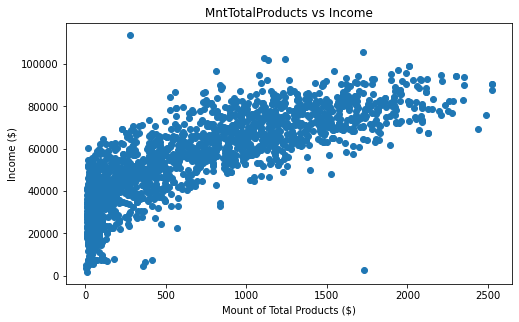

In [ ]:
# 散布図（購入総額と収入）
fig, ax = plt.subplots(figsize = (8.0, 4.8))
plt.scatter(df_filtered['MntTotalProducts'], df_filtered['Income'])
plt.title('MntTotalProducts vs Income')
plt.ylabel('Income ($)')
plt.xlabel('Mount of Total Products ($)')

Text(0, 0.5, 'Mount of Total Products ($)')

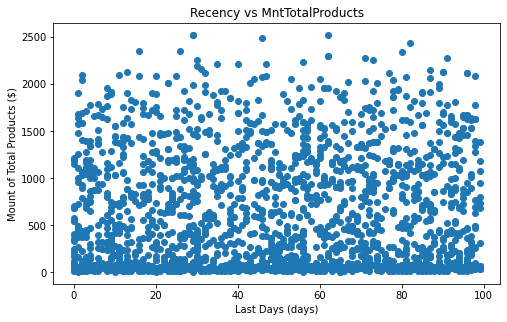

In [ ]:
# 散布図（購入総額と購入頻度）
fig, ax = plt.subplots(figsize = (8.0, 4.8))
plt.scatter(df_filtered['Recency'], df_filtered['MntTotalProducts'])
plt.title('Recency vs MntTotalProducts')
plt.xlabel('Last Days (days)')
plt.ylabel('Mount of Total Products ($)')

In [ ]:
# マーケティングキャンペーンへの反応
df_customer['Number of Campaign Needed'] = pd.Series()

c = 0
for i in range(len(campaign_df)):
  d = dict(campaign_df.iloc[i])
  for j in range(len(d)):
    if (d[f'AcceptedCmp{j + 1}'] == 0):
      c += 1
    else :
      break
  df_customer['Number of Campaign Needed'].iloc[i] = c
  c = 0

df_customer.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Dt_Customer,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age,MntTotalProducts,Age Group,1st Best Product,2nd Best Product,Number of Campaign Needed
0,2012-04-09,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,1617,60.0,3.0,4.0,5.0
1,2014-08-03,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,27,60.0,3.0,6.0,6.0
2,2013-08-21,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,776,50.0,3.0,4.0,6.0
3,2014-10-02,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,53,30.0,3.0,4.0,6.0
4,2014-01-19,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,422,40.0,3.0,4.0,6.0
5,2013-09-09,7446,1967,Master,Together,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,54,716,50.0,3.0,2.0,6.0
6,2012-11-13,965,1971,Graduation,Divorced,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,50,590,50.0,3.0,2.0,6.0
7,2013-08-05,6177,1985,PhD,Married,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,36,169,30.0,3.0,6.0,6.0
8,2013-06-06,4855,1974,PhD,Together,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,47,46,40.0,3.0,4.0,5.0
9,2014-03-13,5899,1950,PhD,Together,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,71,49,60.0,6.0,3.0,2.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 <a list of 35 Text major ticklabel objects>)

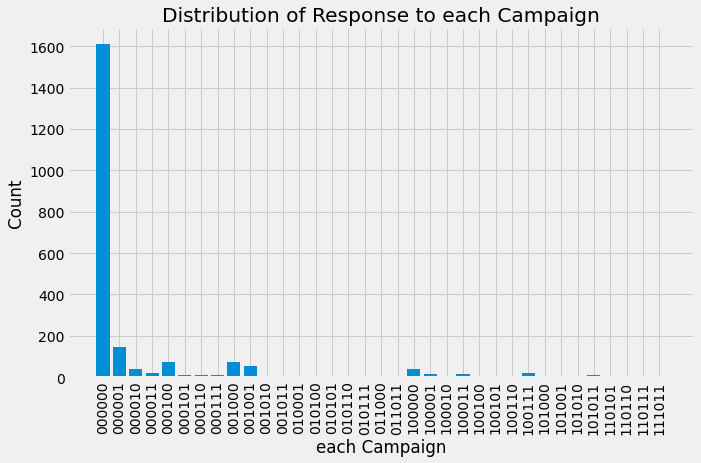

In [131]:
# マーケティングキャンペーンへの反応
for i in range(1, 7):
  campaign_df[f'AcceptedCmp{i}'] = campaign_df[f'AcceptedCmp{i}'].astype(str)
campaign_df['AcceptedCmp_all'] = campaign_df['AcceptedCmp1'] + campaign_df['AcceptedCmp2'] + campaign_df['AcceptedCmp3'] + campaign_df['AcceptedCmp4'] + campaign_df['AcceptedCmp5'] + campaign_df['AcceptedCmp6']
campaign_df['AcceptedCmp_all'].astype(int)

x = campaign_df['AcceptedCmp_all'].unique()
x = np.sort(x)
y = campaign_df['AcceptedCmp_all'].value_counts()
y = y.sort_index()

fig, ax = plt.subplots(figsize=(10.0, 6.0))
plt.bar(x=x, height=y)
plt.title('Distribution of Response to each Campaign')
plt.xlabel('each Campaign')
plt.ylabel('Count')
plt.xticks(rotation=90)


<BarContainer object of 100 artists>

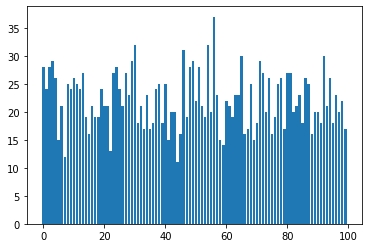

In [ ]:
# 購入頻度
recency = df_customer['Recency'].value_counts()
plt.bar(recency.index, recency.values)

## ここからはK-平均法を用いてクラスタリング分析を行う

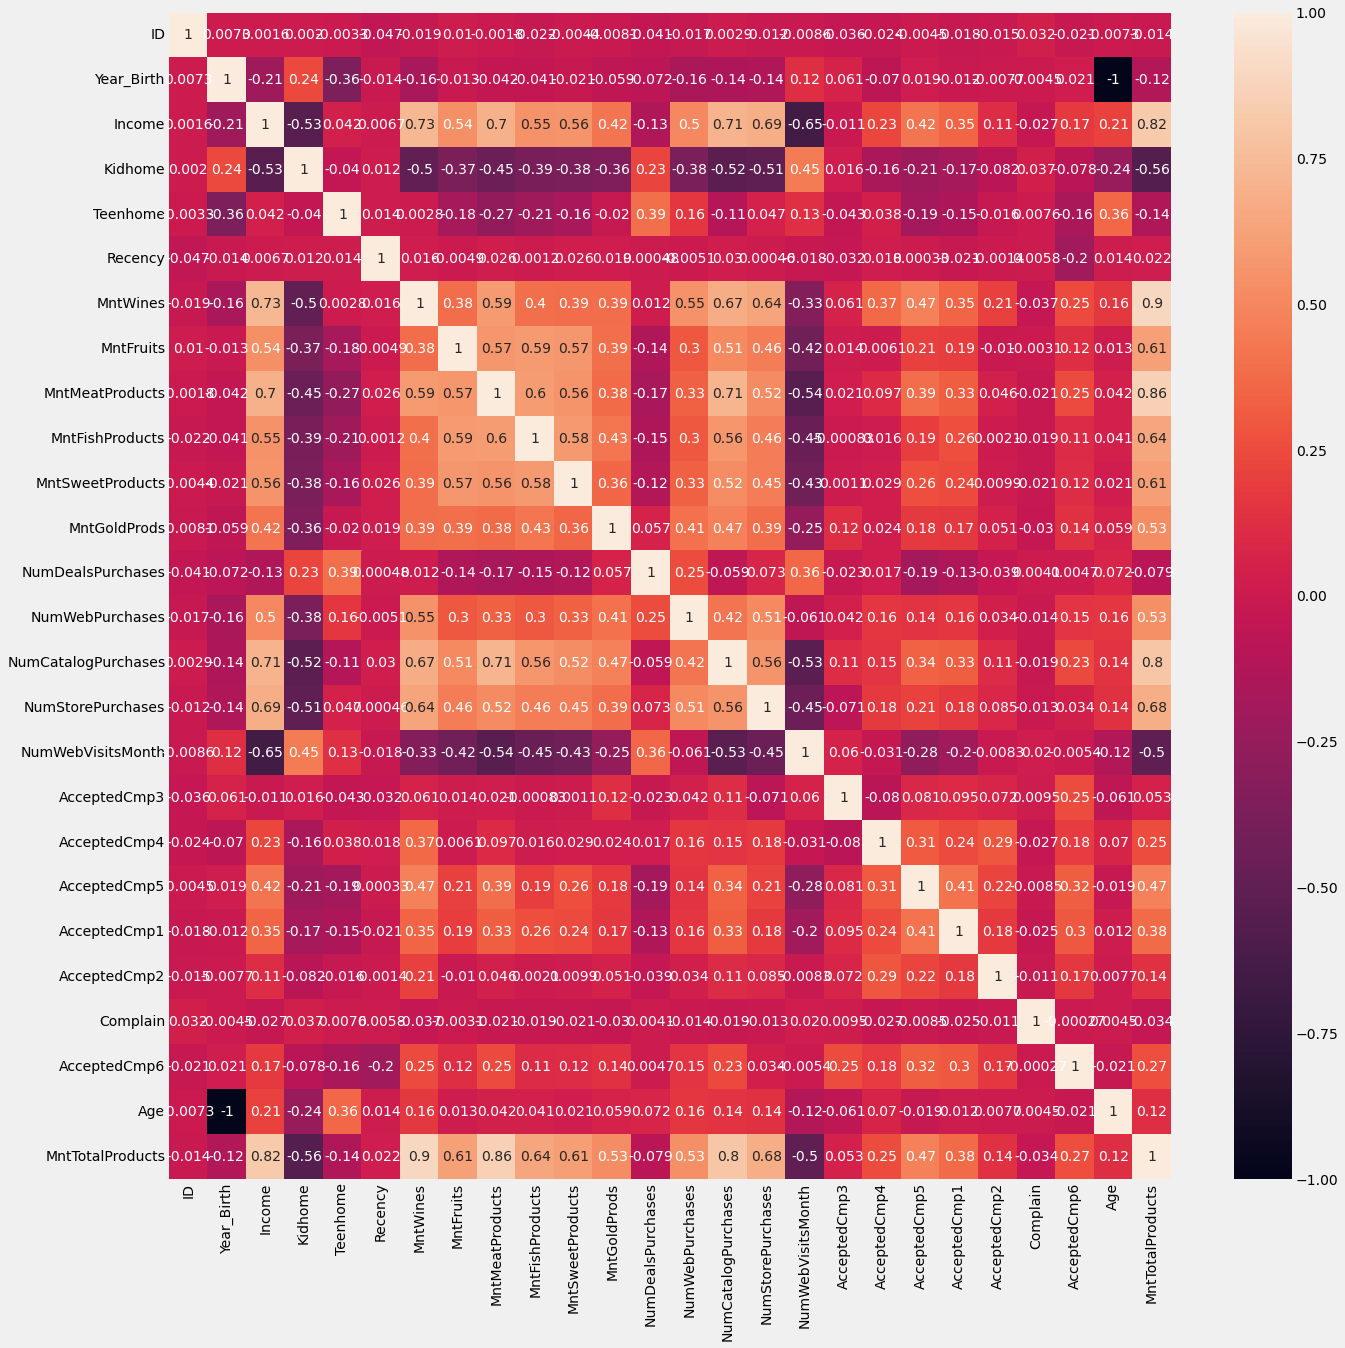

In [ ]:
# 全体データの相関関係
plt.figure(figsize=(20,20))
sns.heatmap(df_filtered.corr(), annot=True)

MntTotalProducts列はMnt〇〇列の総和でありこれらとの相関係数が極端に高い事からクラスタリングに用いるデータとしてはノイズと判断し、除去しておく

In [ ]:
# クラスタリング
df_clustering = df_filtered.loc[ : , ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']]

df_clustering.head()

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,64,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,67,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,56,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,37,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,40,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5


In [ ]:
# データの標準化
scaler = StandardScaler()
clustering_scalered = scaler.fit_transform(df_clustering)

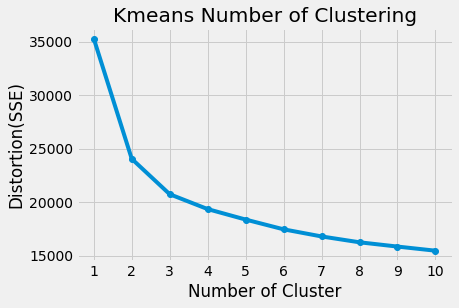

In [ ]:
# K-平均法を適応
kmeans_kwargs = {
    "init" : "random",
    "n_init" : 10,
    "max_iter" : 300,
    "random_state" : 42
}

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(clustering_scalered)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse, marker = "o")
plt.xticks(range(1, 11))
plt.xlabel('Number of Cluster')
plt.ylabel('Distortion(SSE)')
plt.title('Kmeans Number of Clustering')
plt.show()

上記の表（エルボー図）からクラス多数は2もしくは3程度が妥当だと考えられる。

In [ ]:
kmeans = KMeans(3)
kmeans.fit(df_clustering)
identified_clusters = kmeans.fit_predict(df_clustering)

# set関数を用いて重複する要素を持つリストやタプルを削除し、クラスタ数を確認する
s = set(identified_clusters)

l = list(s)
print(l)
print('*************************************************')
identified_clusters

[0, 1, 2]
*************************************************


array([2, 2, 1, ..., 2, 1, 2], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[4.77684798e+01, 2.79638494e+04, 8.14504881e-01, 3.08228731e-01,
        4.83514644e+01, 2.95746165e+01, 5.79916318e+00, 2.49358438e+01,
        9.03905160e+00, 5.98326360e+00, 1.74295676e+01, 2.14783821e+00,
        2.12691771e+00, 5.27196653e-01, 3.06276151e+00, 6.91213389e+00],
       [5.36215084e+01, 7.54994553e+04, 9.35754190e-02, 3.78491620e-01,
        4.89818436e+01, 6.22554469e+02, 5.65670391e+01, 3.85688547e+02,
        8.13337989e+01, 5.93533520e+01, 7.09553073e+01, 1.66480447e+00,
        5.53351955e+00, 5.32122905e+00, 8.49301676e+00, 3.30865922e+00],
       [5.46994819e+01, 5.14495194e+04, 4.19689119e-01, 8.09585492e-01,
        4.96450777e+01, 2.69610104e+02, 1.75634715e+01, 9.12966321e+01,
        2.40116580e+01, 1.68795337e+01, 4.38406736e+01, 3.08290155e+00,
        4.60492228e+00, 2.13082902e+00, 5.91191710e+00, 5.75518135e+00]])

In [ ]:
df_clustering['Cluster'] = identified_clusters
df_clustering.head()

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cluster
0,64,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,2
1,67,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,2
2,56,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,1
3,37,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0
4,40,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,2


In [ ]:
# シルエット分析
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib import cm

In [ ]:
score = silhouette_score(clustering_scalered, kmeans.labels_)
round(score, 4)

0.1241

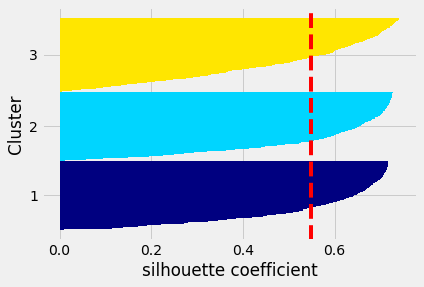

In [ ]:
## シルエット分析の実行と横棒グラフでの図示
"""
時間があるときに各クラスタの散布図も図示する
"""

silhouette_values = silhouette_samples(df_clustering, identified_clusters, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
y_ticks = []
n_clusters = len(l)

###クラスター数の標準化
np_l = np.array(l)
np_1 = np.array([1,1,1])
l_std = np_l + np_1

for i, c in enumerate(l):
  c_silhouette_vals = silhouette_values[identified_clusters == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),
           c_silhouette_vals,
           height = 1.0,
           edgecolor = 'none',
           color = color)
  y_ticks.append((y_ax_lower + y_ax_upper) / 2)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_values)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(y_ticks, l_std)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [ ]:
# 各クラスターの定義と特徴分析
cluster_0 = df_clustering[df_clustering['Cluster'] == 0]
cluster_1 = df_clustering[df_clustering['Cluster'] == 1]
cluster_2 = df_clustering[df_clustering['Cluster'] == 2]

In [ ]:
# クラスター0の特徴
cluster_0_desc = cluster_0.describe().transpose()
cluster_0_desc

,count,mean,std,min,25%,50%,75%,max
Age,718.0,47.753482,10.688265,25.0,40.0,47.0,54.00,75.0
Income,718.0,27980.172702,8302.731234,1730.0,22574.0,29545.5,34802.50,39684.0
Kidhome,718.0,0.814763,0.475866,0.0,1.0,1.0,1.00,2.0
Teenhome,718.0,0.307799,0.479680,0.0,0.0,0.0,1.00,2.0
Recency,718.0,48.341226,28.726804,0.0,24.0,49.0,74.00,99.0
MntWines,718.0,29.559889,44.217683,0.0,5.0,14.0,31.00,284.0
MntFruits,718.0,5.791086,11.542213,0.0,1.0,3.0,6.00,151.0
MntMeatProducts,718.0,24.949861,70.313109,0.0,7.0,13.0,23.75,1725.0
MntFishProducts,718.0,9.034819,18.773632,0.0,2.0,4.0,10.00,208.0
MntSweetProducts,718.0,5.980501,11.719033,0.0,1.0,3.0,7.00,157.0


In [ ]:
# クラスター1の特徴
cluster_1_desc = cluster_1.describe().transpose()
cluster_1_desc

,count,mean,std,min,25%,50%,75%,max
Age,716.0,53.621508,12.523121,26.0,45.00,53.0,64.00,80.0
Income,716.0,75499.455307,8284.121006,63516.0,68731.00,74760.5,80959.50,113734.0
Kidhome,716.0,0.093575,0.305498,0.0,0.00,0.0,0.00,2.0
Teenhome,716.0,0.378492,0.521467,0.0,0.00,0.0,1.00,2.0
Recency,716.0,48.981844,29.410782,0.0,23.00,50.0,73.00,99.0
MntWines,716.0,622.554469,320.254442,6.0,379.50,572.0,835.25,1493.0
MntFruits,716.0,56.567039,48.371230,0.0,20.00,39.5,83.00,197.0
MntMeatProducts,716.0,385.688547,237.905521,3.0,183.75,351.5,538.00,984.0
MntFishProducts,716.0,81.333799,65.454380,0.0,28.75,65.0,124.25,258.0
MntSweetProducts,716.0,59.353352,50.944802,0.0,20.00,40.5,91.00,262.0


In [ ]:
# クラスター2の特徴
cluster_2_desc = cluster_2.describe().transpose()
cluster_2_desc

,count,mean,std,min,25%,50%,75%,max
Age,771.0,54.722438,10.656295,29.0,46.0,54.0,64.0,81.0
Income,771.0,51464.779507,6982.297335,39722.0,45355.0,51315.0,57335.5,63404.0
Kidhome,771.0,0.418936,0.534138,0.0,0.0,0.0,1.0,2.0
Teenhome,771.0,0.810636,0.486643,0.0,1.0,1.0,1.0,2.0
Recency,771.0,49.656291,28.696620,0.0,25.0,51.0,74.0,99.0
MntWines,771.0,269.935149,251.453259,2.0,69.0,194.0,388.0,1241.0
MntFruits,771.0,17.586252,30.228545,0.0,1.0,6.0,17.5,199.0
MntMeatProducts,771.0,91.369650,97.956800,1.0,24.5,62.0,121.0,706.0
MntFishProducts,771.0,24.035019,39.666664,0.0,2.0,8.0,28.0,259.0
MntSweetProducts,771.0,16.896239,28.581524,0.0,0.0,6.0,19.0,192.0


In [ ]:
cluster_index = cluster_0.index

cluster_cmp = pd.DataFrame()
cluster_cmp = cluster_cmp.append(cluster_0_desc['mean'])
cluster_cmp = cluster_cmp.rename(index={'mean' : 'cluster_0'})
cluster_cmp = cluster_cmp.append(cluster_1_desc['mean'])
cluster_cmp = cluster_cmp.rename(index={'mean' : 'cluster_1'})
cluster_cmp = cluster_cmp.append(cluster_2_desc['mean'])
cluster_cmp = cluster_cmp.rename(index={'mean' : 'cluster_2'})
cluster_cmp.T

,cluster_0,cluster_1,cluster_2
Age,47.753482,53.621508,54.722438
Cluster,0.000000,1.000000,2.000000
Income,27980.172702,75499.455307,51464.779507
Kidhome,0.814763,0.093575,0.418936
MntFishProducts,9.034819,81.333799,24.035019
MntFruits,5.791086,56.567039,17.586252
MntGoldProds,17.428969,70.955307,43.875486
MntMeatProducts,24.949861,385.688547,91.369650
MntSweetProducts,5.980501,59.353352,16.896239
MntWines,29.559889,622.554469,269.935149
